# Pandas hands-on

The goal of this notebook is to get acquainted with some of the core functionalities of Pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Basic manipulations on dataframes

Run the commands in the cells below to create a dataframe starting from a dictionary.

In [2]:
family = pd.DataFrame({'name': ['Alice', 'Bob', 'Cathy', 'Daniel', 'Emily'], 'age': [38, 38, 9, 6, 6], 'parent-child': ['P', 'P', 'C', 'C', 'C']})

In [3]:
family

,name,age,parent-child
0,Alice,38,P
1,Bob,38,P
2,Cathy,9,C
3,Daniel,6,C
4,Emily,6,C


Use the **set_index** command to make the *name* column become the index of the dataframe.

**Nb:** the goal is not to create a new dataframe, but have the *family* dataframe itself modified with the new index.

In [4]:
family.set_index('name', inplace=True)

In [5]:
family

,age,parent-child
name,,
Alice,38,P
Bob,38,P
Cathy,9,C
Daniel,6,C
Emily,6,C


Select the *age* column from this dataframe, using attribute-based selection.

In [6]:
family.age

name
Alice     38
Bob       38
Cathy      9
Daniel     6
Emily      6
Name: age, dtype: int64

Select the *age* column from this dataframe, using the name of the column.

In [7]:
family['age']

name
Alice     38
Bob       38
Cathy      9
Daniel     6
Emily      6
Name: age, dtype: int64

Use the **iloc** command on the dataframe to select the element at the second row and first column.

In [8]:
family.iloc[1,0]

38

Use the **iloc** command to get a slice of the dataframe containing the last three rows.

In [9]:
family.iloc[-3:,:]

,age,parent-child
name,,
Cathy,9,C
Daniel,6,C
Emily,6,C


Use the **loc** command to get a series of booleans that are true for the rows containing the '*C*' attribute in the *parent-child* column.

In [10]:
family["parent-child"]=='C'

name
Alice     False
Bob       False
Cathy      True
Daniel     True
Emily      True
Name: parent-child, dtype: bool

Use the **loc** command to get a slice of the dataframe containing all the children ('*C*' attribute).

In [11]:
family.loc[family['parent-child']=='C']

,age,parent-child
name,,
Cathy,9,C
Daniel,6,C
Emily,6,C


Copy the slice of the dataframe containing all the children into a new dataframe named *children*.

In [12]:
children = family.loc[family['parent-child'] == 'C'].copy()

In [13]:
children

,age,parent-child
name,,
Cathy,9,C
Daniel,6,C
Emily,6,C


Use the **loc** method to add a new child, Franck, age 0, to the *family* dataframe.

**Hint:** reset the index before adding the row, and then set it back to the **name** column.

In [14]:
family.reset_index(inplace=True)
family.loc[len(family)] = {'name': 'Franck', 'age': 0, 'parent-child': 'C'}
family.set_index('name', inplace=True)

In [15]:
family

,age,parent-child
name,,
Alice,38,P
Bob,38,P
Cathy,9,C
Daniel,6,C
Emily,6,C
Franck,0,C


Add a column named *sex* to the *family* dataframe, stating whether the individual is male ('*M*'), or female ('*F*').

In [16]:
family['sex'] = ['F', 'M', 'F', 'M', 'F', 'M']

Increase the age of each family member by 1.

In [17]:
family.loc[:,'age'] = family.age + 1

In [18]:
family

,age,parent-child,sex
name,,,
Alice,39,P,F
Bob,39,P,M
Cathy,10,C,F
Daniel,7,C,M
Emily,7,C,F
Franck,1,C,M


## Analysis of numerical data

Create a dataframe named **crypto_prices** containing the data available in the file **crypto_prices.csv**. Use the **parse_dates** argument to specify that the first column consists of dates.

In [19]:
crypto_prices = pd.read_csv("crypto_prices.csv", parse_dates=[0])

Set the index of **crypto_prices** to be the *date* column.

In [20]:
crypto_prices.set_index('date', inplace=True)

Use the *info()* method to get a summary of the contents of **crypto_prices**.

In [21]:
crypto_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 809 entries, 2018-03-10 to 2020-05-26
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   0x                     809 non-null    float64
 1   aave                   809 non-null    float64
 2   augur                  809 non-null    float64
 3   basic-attention-token  809 non-null    float64
 4   binance-coin           809 non-null    float64
 5   bitcoin-cash           809 non-null    float64
 6   bitcoin                809 non-null    float64
 7   bytom                  809 non-null    float64
 8   cardano                809 non-null    float64
 9   chainlink              809 non-null    float64
 10  dash                   809 non-null    float64
 11  decentraland           809 non-null    float64
 12  decred                 809 non-null    float64
 13  digibyte               809 non-null    float64
 14  dogecoin               809 non-null    

Use the *describe()* method to retrieve basic statistics about the data in the **crypto_prices** 

In [22]:
crypto_prices.describe()

,0x,aave,augur,basic-attention-token,binance-coin,bitcoin-cash,bitcoin,bytom,cardano,chainlink,...,status,stellar,tether,theta,tron,waves,wax,xrp,zcash,zilliqa
count,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,...,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000
mean,0.454733,0.020540,17.147651,0.228927,16.134944,421.829023,7299.306786,0.189546,0.083096,1.398354,...,0.035938,0.138135,1.001748,0.112059,0.025888,2.165449,0.076126,0.363534,96.707713,0.028548
std,0.335863,0.017989,9.979124,0.076607,7.344888,306.729980,2137.463260,0.201809,0.065250,1.237721,...,0.033955,0.090727,0.007528,0.043304,0.014564,1.351344,0.068303,0.153306,73.663084,0.032859
min,0.137635,0.003309,5.600000,0.105539,4.530000,77.370000,3236.760000,0.046071,0.023961,0.166278,...,0.008436,0.033441,0.966644,0.041273,0.008792,0.533447,0.016402,0.139635,24.500000,0.003264
25%,0.235913,0.008246,10.300000,0.174372,10.440000,222.350000,6249.180000,0.078120,0.042363,0.359287,...,0.015848,0.066138,0.999204,0.087274,0.016056,1.050000,0.032677,0.261971,46.710000,0.006734
50%,0.305550,0.013532,13.510000,0.211568,14.920000,311.500000,7343.900000,0.107229,0.057645,0.544724,...,0.022141,0.104598,1.000000,0.107729,0.022581,1.970000,0.059803,0.317031,63.170000,0.017685
75%,0.633143,0.025837,20.010000,0.270791,19.740000,512.920000,8815.660000,0.186924,0.089754,2.320000,...,0.037070,0.210144,1.010000,0.129849,0.028932,2.730000,0.083725,0.445852,126.340000,0.035206
max,1.870000,0.096902,56.800000,0.503444,38.820000,1765.690000,13016.230000,1.170000,0.372420,4.720000,...,0.175958,0.458405,1.050000,0.416597,0.093777,7.830000,0.427537,0.934781,366.850000,0.200330


Create a new dataframe called **btc_eth**, and containing the prices for *bitcoin* and *ethereum* from Jan. 1st 2019 until May 1st 2019.

**Nb:** don't forget to use the *copy()* method to make sure **btc_eth** is indeed a new dataframe.

In [23]:
btc_eth = crypto_prices.loc['2019-1-1': '2019-5-1', ['bitcoin', 'ethereum']].copy()

In order to compare the price evolution of both cryptocurrencies, we will plot them with the same basis.

Use the *pct_change()* method to compute the daily returns of both cryptocurrencies, store the result in a dataframe called **btc_eth_rets**. 

In [24]:
btc_eth_rets = btc_eth.pct_change()

Create a dataframe **btc_eth_perf** containing the daily performances of both cryptocurrencies, and set the value of the first row to 1.

In [25]:
btc_eth_perf= 1+ btc_eth_rets
btc_eth_perf.iloc[0,:] = 1

Create a dataframe **btc_eth_base100** containing the price evolutions of both cryptocurrencies if their value on Jan 1st had been 100.

In [26]:
btc_eth_base100 = 100 * btc_eth_perf.cumprod()

Plot both price evolutions using the *plot* method on the **btc_eth_base100** dataframe.

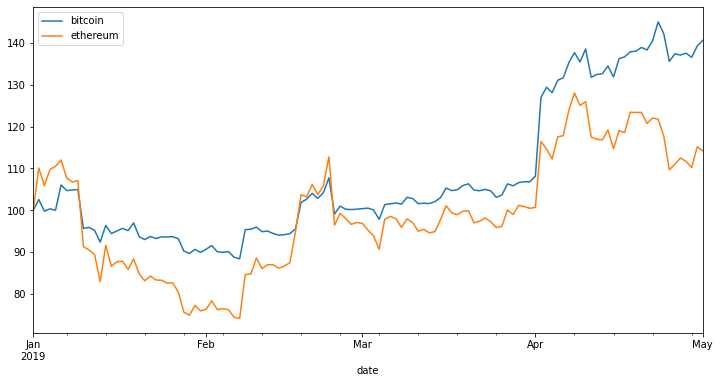

In [27]:
btc_eth_base100.plot(figsize=(12, 6))

The goal of this part is to perform a linear regression and obtain the values $\alpha$ and $\beta$ such that
$$R_e = \alpha + \beta\cdot R_b + \epsilon,$$
where:
- $R_e$ denotes the returns of **ethereum**,
- $R_b$ denotes the returns of **bitcoin**,
- $\epsilon$ is a white noise.


Create a dataframe **btc_eth_na** containing the returns of both cryptocurrencies without the first *NA* value.

In [28]:
btc_eth_na = btc_eth.pct_change().dropna()

Use the ordinary least squares method from **statmodels** (*OLS* method) to compute the regression, store this result in a variable **reg**. 

In [29]:
intercept = sm.add_constant(btc_eth_na.bitcoin)
reg = sm.OLS(btc_eth_na.ethereum, intercept).fit()

Print out the summary of **reg**.

In [30]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               ethereum   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     422.0
Date:                Fri, 05 Feb 2021   Prob (F-statistic):           8.85e-41
Time:                        10:42:01   Log-Likelihood:                 305.09
No. Observations:                 120   AIC:                            -606.2
Df Residuals:                     118   BIC:                            -600.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.002     -1.354      0.1

Use the *predict* method on **reg** to predict the returns of **ethereum** and plot the regressed line along with the actual returns of the cryptocurrency.

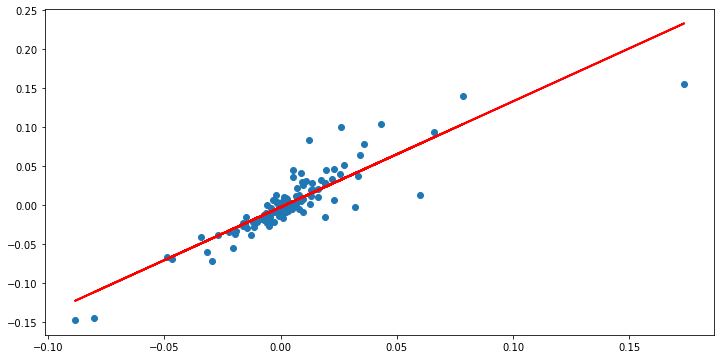

In [31]:
pred = reg.predict(intercept)
plt.figure(figsize=(12, 6))
plt.plot(btc_eth_na.bitcoin, btc_eth_na.ethereum,  'o')  
plt.plot(btc_eth_na.bitcoin, pred, 'r', linewidth=2) 